In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json, re

In [50]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")

In [51]:
bench_result = json.load(open("../../build/bench/BMPlnVsOpenCV_Dilation_result.json"))

In [52]:
benchmarks = {'Pln_DiscDecompPeriodic': [], 'Pln_RectDecomp': [], 'CV_Disc': [], 'CV_Rect': []}
size_se_p = re.compile(".*/([0-9]+)")
indexes = []
for bench in bench_result['benchmarks']:
    for k in benchmarks.keys():
        if k in bench['name']:
            size_se = size_se_p.search(bench['name'])
            assert(size_se is not None)
            benchmarks[k].append({
                'size_se': int(size_se.group(1)),
                'iterations': bench['iterations'],
                'time': bench['real_time'],
                'unit': bench['time_unit'],
                'throughput_bps': bench['bytes_per_second']
            })

data = {'Pln_DiscDecompPeriodic': [], 'Pln_RectDecomp': [], 'CV_Disc': [], 'CV_Rect': []}
indexes = []

for k in benchmarks.keys():
    for ret in benchmarks[k]:
        data[k].append(ret['time'])

_k = list(benchmarks.keys())[0]
for ret in benchmarks[_k]:
    indexes.append(ret['size_se'])

In [53]:
data

{'Pln_DiscDecompPeriodic': [77737730.4999618,
  71815106.66664003,
  250281691.6667143,
  414241685.4999738,
  360622694.49985254,
  523394937.99991035,
  540620693.0001645,
  525841863.0000961,
  616841439.9999164],
 'Pln_RectDecomp': [85737104.50002636,
  79433242.4444393,
  72119219.66664806,
  73978443.69997983,
  68747291.20004304,
  66918769.29999125,
  67850718.59999335,
  71782837.19999853,
  74690375.55554476],
 'CV_Disc': [3866152.7604162414,
  7555414.2530158255,
  19377360.25000605,
  67181520.90909578,
  249150137.6666747,
  1036722522.999753,
  3978791391.999948,
  16223484703.99993,
  63281862451.00005],
 'CV_Rect': [4028691.8802402383,
  5028167.880000183,
  5751235.273584895,
  8348529.573173969,
  13481794.480771195,
  26266491.000013854,
  55820127.66668261,
  110822095.9999926,
  223392546.6666733]}

In [54]:
indexes

[1, 2, 4, 8, 16, 32, 64, 128, 256]

In [55]:
df = pd.DataFrame(data=data, index=indexes, columns=['Pln_DiscDecompPeriodic', 'Pln_RectDecomp', 'CV_Disc', 'CV_Rect'])

In [56]:
df

,Pln_DiscDecompPeriodic,Pln_RectDecomp,CV_Disc,CV_Rect
1,7.773773e+07,8.573710e+07,3.866153e+06,4.028692e+06
2,7.181511e+07,7.943324e+07,7.555414e+06,5.028168e+06
4,2.502817e+08,7.211922e+07,1.937736e+07,5.751235e+06
8,4.142417e+08,7.397844e+07,6.718152e+07,8.348530e+06
16,3.606227e+08,6.874729e+07,2.491501e+08,1.348179e+07
32,5.233949e+08,6.691877e+07,1.036723e+09,2.626649e+07
64,5.406207e+08,6.785072e+07,3.978791e+09,5.582013e+07
128,5.258419e+08,7.178284e+07,1.622348e+10,1.108221e+08
256,6.168414e+08,7.469038e+07,6.328186e+10,2.233925e+08


[None, Text(0, 0.5, 'Time (ns)'), Text(0.5, 0, 'SE size')]

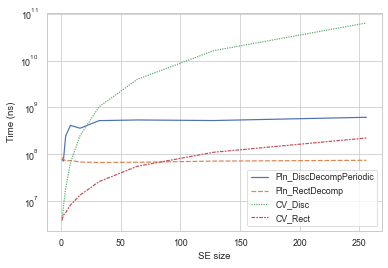

In [64]:
grid = sns.lineplot(data=df, legend="full")
grid.set(yscale="log", xlabel="SE size", ylabel="Time (ns)")

In [68]:
grid.get_figure().savefig("PlnVsOpenCV.png")